# 광주 인공지능 사관학교
- - -
- 작성자 : 2반 한지호
- 작성일 : 20.07.16 목
- 4교시 자연어 처리 시간에 진행한 토크나이저, 어간 추출, 불용어 제거, 인코딩 관련 실습
- 토큰화 -> 어떤 기준대로 나눈다 (단어, 문장, 형태소)

In [1]:
# ! pip install nltk
# ! pip install wordcloud

In [2]:
import nltk

nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
text = '''
I will always remember.
The day you kissed my lips.
Light as a feather.
And it went just like this.
No, it's never been better.
Than the summer of 2002 (ooh).
Uh, we were only eleven.
But acting like grown-ups.
Like we are in the present.
Drinking from plastic cups.
Singing, "Love is forever and ever".
Well, I guess that was true.
'''

In [4]:
from nltk.tokenize import word_tokenize 

# 가장 기본적인 형태 (구두점(')이 있는 부분은 합쳐서 토큰화, ex : It's -> It + 's)  
print(word_tokenize(text)) 

['I', 'will', 'always', 'remember', '.', 'The', 'day', 'you', 'kissed', 'my', 'lips', '.', 'Light', 'as', 'a', 'feather', '.', 'And', 'it', 'went', 'just', 'like', 'this', '.', 'No', ',', 'it', "'s", 'never', 'been', 'better', '.', 'Than', 'the', 'summer', 'of', '2002', '(', 'ooh', ')', '.', 'Uh', ',', 'we', 'were', 'only', 'eleven', '.', 'But', 'acting', 'like', 'grown-ups', '.', 'Like', 'we', 'are', 'in', 'the', 'present', '.', 'Drinking', 'from', 'plastic', 'cups', '.', 'Singing', ',', '``', 'Love', 'is', 'forever', 'and', 'ever', "''", '.', 'Well', ',', 'I', 'guess', 'that', 'was', 'true', '.']


In [5]:
from nltk.tokenize import WordPunctTokenizer

# 위와 달리 구두점(')도 따로 분절화 (ex - : It's -> It + ' + s) 
print(WordPunctTokenizer().tokenize(text)) 

['I', 'will', 'always', 'remember', '.', 'The', 'day', 'you', 'kissed', 'my', 'lips', '.', 'Light', 'as', 'a', 'feather', '.', 'And', 'it', 'went', 'just', 'like', 'this', '.', 'No', ',', 'it', "'", 's', 'never', 'been', 'better', '.', 'Than', 'the', 'summer', 'of', '2002', '(', 'ooh', ').', 'Uh', ',', 'we', 'were', 'only', 'eleven', '.', 'But', 'acting', 'like', 'grown', '-', 'ups', '.', 'Like', 'we', 'are', 'in', 'the', 'present', '.', 'Drinking', 'from', 'plastic', 'cups', '.', 'Singing', ',', '"', 'Love', 'is', 'forever', 'and', 'ever', '".', 'Well', ',', 'I', 'guess', 'that', 'was', 'true', '.']


In [6]:
from nltk.tokenize import TreebankWordTokenizer

# 가장 표준화 된 모델 (하이폰 유지, 구두점(') 분리, ex : It's -> It' + s) 
print(TreebankWordTokenizer().tokenize(text)) 

['I', 'will', 'always', 'remember.', 'The', 'day', 'you', 'kissed', 'my', 'lips.', 'Light', 'as', 'a', 'feather.', 'And', 'it', 'went', 'just', 'like', 'this.', 'No', ',', 'it', "'s", 'never', 'been', 'better.', 'Than', 'the', 'summer', 'of', '2002', '(', 'ooh', ')', '.', 'Uh', ',', 'we', 'were', 'only', 'eleven.', 'But', 'acting', 'like', 'grown-ups.', 'Like', 'we', 'are', 'in', 'the', 'present.', 'Drinking', 'from', 'plastic', 'cups.', 'Singing', ',', '``', 'Love', 'is', 'forever', 'and', 'ever', "''", '.', 'Well', ',', 'I', 'guess', 'that', 'was', 'true', '.']


In [7]:
from nltk.tokenize import RegexpTokenizer

# 정규 표현식을 사용할 수 있는 토크나이저
# 실습 문제 : ''안에 정규 표현식을 작성해서 단어별로 토큰화가 되도록 해주세요.
print(RegexpTokenizer('\w+').tokenize(text)) 

['I', 'will', 'always', 'remember', 'The', 'day', 'you', 'kissed', 'my', 'lips', 'Light', 'as', 'a', 'feather', 'And', 'it', 'went', 'just', 'like', 'this', 'No', 'it', 's', 'never', 'been', 'better', 'Than', 'the', 'summer', 'of', '2002', 'ooh', 'Uh', 'we', 'were', 'only', 'eleven', 'But', 'acting', 'like', 'grown', 'ups', 'Like', 'we', 'are', 'in', 'the', 'present', 'Drinking', 'from', 'plastic', 'cups', 'Singing', 'Love', 'is', 'forever', 'and', 'ever', 'Well', 'I', 'guess', 'that', 'was', 'true']


In [8]:
from nltk.tokenize import sent_tokenize

# 문장의 토큰화 (문장별로 나눠서 리스트화) 
print(sent_tokenize(text))

['\nI will always remember.', 'The day you kissed my lips.', 'Light as a feather.', 'And it went just like this.', "No, it's never been better.", 'Than the summer of 2002 (ooh).', 'Uh, we were only eleven.', 'But acting like grown-ups.', 'Like we are in the present.', 'Drinking from plastic cups.', 'Singing, "Love is forever and ever".', 'Well, I guess that was true.']


In [9]:
from nltk.stem import PorterStemmer 

# 어간 : 단어의 의미를 담는 부분 
# 어간 추출기 : 원래 단어를 찾아야 의미를 정확하게 파악 가능 (ex : plays -> play, loving -> love) 
words = word_tokenize(text) 
for word in words:
    print(PorterStemmer().stem(word)) 

I
will
alway
rememb
.
the
day
you
kiss
my
lip
.
light
as
a
feather
.
and
it
went
just
like
thi
.
No
,
it
's
never
been
better
.
than
the
summer
of
2002
(
ooh
)
.
Uh
,
we
were
onli
eleven
.
but
act
like
grown-up
.
like
we
are
in
the
present
.
drink
from
plastic
cup
.
sing
,
``
love
is
forev
and
ever
''
.
well
,
I
guess
that
wa
true
.


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

# stopwords : 불용어 (문장의 의미를 형성하는 것에 있어 큰 영향을 미치지 않는 단어들) 
# sw = stopwords.words('english') 
sw = ['.', ',', "'"] # stopwords list는 필요에 따라 직접 만들거나 추가하여 사용하는게 가장 좋음
# print(sw) 

# 실습 문제 : words 리스트 안에서 sw 에 해당하는 단어를 제외시킨 리스트를 생성해주세요.
sw_removed = []
for word in words:
    if word.lower() not in sw:
        sw_removed.append(word)
        
print(sw_removed) 

['I', 'will', 'always', 'remember', 'The', 'day', 'you', 'kissed', 'my', 'lips', 'Light', 'as', 'a', 'feather', 'And', 'it', 'went', 'just', 'like', 'this', 'No', 'it', "'s", 'never', 'been', 'better', 'Than', 'the', 'summer', 'of', '2002', '(', 'ooh', ')', 'Uh', 'we', 'were', 'only', 'eleven', 'But', 'acting', 'like', 'grown-ups', 'Like', 'we', 'are', 'in', 'the', 'present', 'Drinking', 'from', 'plastic', 'cups', 'Singing', '``', 'Love', 'is', 'forever', 'and', 'ever', "''", 'Well', 'I', 'guess', 'that', 'was', 'true']


In [12]:
# 인코딩 - 컴퓨터는 영어로 된 텍스트를 알아들을 수 없다. 가장 기본적인 것이 빈도수대로 인덱스를 부여하는 것.
# 문자 빈도수 카운팅 : Counter는 빈도수가 가장 높은 것이 가장 앞에 온다.
from collections import Counter

count_list = Counter(sw_removed)  
print(count_list) 

Counter({'I': 2, 'it': 2, 'like': 2, 'the': 2, 'we': 2, 'will': 1, 'always': 1, 'remember': 1, 'The': 1, 'day': 1, 'you': 1, 'kissed': 1, 'my': 1, 'lips': 1, 'Light': 1, 'as': 1, 'a': 1, 'feather': 1, 'And': 1, 'went': 1, 'just': 1, 'this': 1, 'No': 1, "'s": 1, 'never': 1, 'been': 1, 'better': 1, 'Than': 1, 'summer': 1, 'of': 1, '2002': 1, '(': 1, 'ooh': 1, ')': 1, 'Uh': 1, 'were': 1, 'only': 1, 'eleven': 1, 'But': 1, 'acting': 1, 'grown-ups': 1, 'Like': 1, 'are': 1, 'in': 1, 'present': 1, 'Drinking': 1, 'from': 1, 'plastic': 1, 'cups': 1, 'Singing': 1, '``': 1, 'Love': 1, 'is': 1, 'forever': 1, 'and': 1, 'ever': 1, "''": 1, 'Well': 1, 'guess': 1, 'that': 1, 'was': 1, 'true': 1})


In [13]:
# 상위 10개 까지만 리스트 안에 (단어, 횟수)형태의 튜플로 저장 - 빈도수가 1인 것들은 크게 의미가 없을 가능성이 높으므로..!
common_cl = count_list.most_common(10) 
print(common_cl) 

[('I', 2), ('it', 2), ('like', 2), ('the', 2), ('we', 2), ('will', 1), ('always', 1), ('remember', 1), ('The', 1), ('day', 1)]


In [14]:
# 실습 : 딕셔너리 형태로 변환, {word, frequency} 라고 했을 때, 빈도수가 높은 순서대로 순위를 매겨서 {'word': 빈도 순위}가 되도록 
# 즉, 빈도의 순위대로 0위~9위 (빈도수가 가장 높은게 0등) 
common_cl_dict = {}

i = 0
for (key, value) in common_cl:
    common_cl_dict[key] = i
    i += 1
    
print(common_cl_dict) 

{'I': 0, 'it': 1, 'like': 2, 'the': 3, 'we': 4, 'will': 5, 'always': 6, 'remember': 7, 'The': 8, 'day': 9}


In [15]:
# 원-핫 인코딩 구현
oh_vector_list = []

for value in common_cl_dict.values():
    oh_vector = [0] * len(common_cl_dict)
    oh_vector[value] = 1
    oh_vector_list.append(oh_vector)

print(oh_vector_list)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


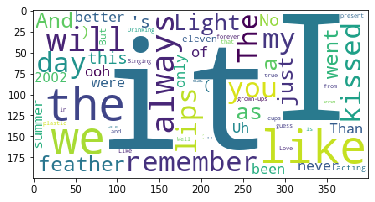

In [16]:
# WordCloud 구현
from wordcloud import WordCloud
import matplotlib.pyplot as plt

my_wc = WordCloud(background_color="white")
plt.imshow(my_wc.generate_from_frequencies(count_list)) 
plt.show() 